# A Simple Defect Detection Approach from a Control Chart Perspective

In [ ]:
#pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
image=cv2.imread( "0075.jpg" ,0)
cv2.imshow("Grayscale1",image)
cv2.imwrite("grayscale_image.jpg", image)
image_path = "grayscale_image.jpg"
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#print(gray_image)

## X-BAR CONTROL CHARTS FOR ROWS

X-bar charts are constructed for each row, employing 3-sigma control limits. Out-of-control pixel values are identified and highlighted on the image by setting them 0.

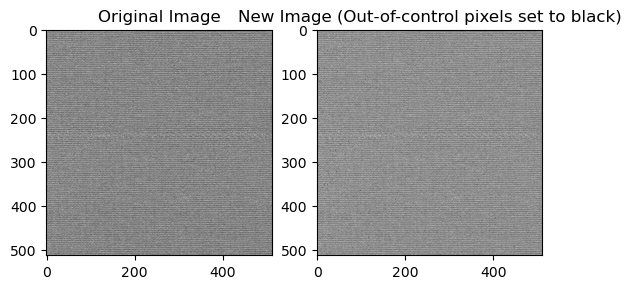

[[3, 52], [18, 357], [23, 95], [35, 345], [49, 24], [54, 35], [64, 31], [67, 148], [88, 5], [88, 16], [96, 46], [102, 64], [102, 137], [113, 109], [113, 127], [115, 26], [118, 6], [122, 67], [128, 127], [129, 460], [131, 120], [135, 56], [136, 34], [138, 348], [144, 14], [144, 16], [146, 26], [146, 221], [148, 318], [161, 110], [172, 392], [176, 361], [179, 167], [201, 109], [204, 374], [220, 395], [239, 321], [247, 493], [249, 130], [253, 71], [257, 22], [261, 52], [266, 2], [274, 30], [274, 41], [278, 499], [287, 102], [296, 102], [301, 353], [301, 388], [306, 310], [309, 2], [314, 333], [322, 24], [322, 44], [326, 47], [327, 26], [339, 34], [340, 365], [342, 342], [348, 63], [352, 16], [352, 23], [358, 63], [360, 342], [361, 23], [365, 97], [371, 14], [378, 84], [383, 16], [385, 177], [400, 37], [410, 15], [417, 63], [417, 98], [417, 116], [418, 169], [424, 325], [426, 27], [426, 58], [426, 76], [428, 4], [428, 403], [433, 262], [436, 118], [456, 48], [457, 243], [457, 390], [461, 4

In [2]:
#row x-bar chart
def generate_row_xbar_chart(image, control_limit):
    new_image = np.copy(image)
    out_of_control_pixels = []

    for i in range(image.shape[0]):
        row_data = image[i, :]
        xbar = np.mean(row_data)
        s = np.std(row_data, ddof=1)

        xbar_upper_limit = xbar + control_limit * s
        xbar_lower_limit = max(xbar - control_limit * s, 0)

        for j in range(image.shape[1]):
            if image[i, j] < xbar_lower_limit or image[i, j] > xbar_upper_limit:
                new_image[i, j] = 0
                out_of_control_pixels.append([i, j])
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(new_image, cmap='gray')
    plt.title('New Image (Out-of-control pixels set to black)')

    plt.show()

    return new_image, out_of_control_pixels


new_image, out_of_control_pixels = generate_row_xbar_chart(gray_image, control_limit=3)
print(out_of_control_pixels)


   

The defect could not be identified. Two of the control charts are plotted below as an example.

In [3]:
def generate_row_xbar_chart_single_row(image, r):
    new_image = np.copy(image)
    out_of_control_pixels = []

    row_data = image[r, :]
    xbar = np.mean(row_data)
    s = np.std(row_data, ddof=1)

    xbar_upper_limit = xbar + 3 * s
    xbar_lower_limit = max(xbar - 3 * s, 0)

    for j in range(image.shape[1]):
        if image[r, j] < xbar_lower_limit or image[r, j] > xbar_upper_limit:
            new_image[r, j] = 0
            out_of_control_pixels.append([r, j])
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    plt.plot(row_data, label='Row {}'.format(r), color='cornflowerblue', linewidth=2)
    plt.axhline(y=xbar_upper_limit, color='r', linestyle='--', linewidth=1.5)
    plt.axhline(y=xbar_lower_limit, color='r', linestyle='--',  linewidth=1.5)

    for j in range(len(out_of_control_pixels)):
        idx = out_of_control_pixels[j][1]
        plt.scatter(idx, row_data[idx], color='black', marker='x', s=50, label='Out-of-Control' if j == 0 else '')
    plt.title('Row {}'.format(r))
    plt.legend()
    plt.show()

    return out_of_control_pixels

 The selected rows are 426 and 495, as out-of-control points are observed in these rows in the output above.

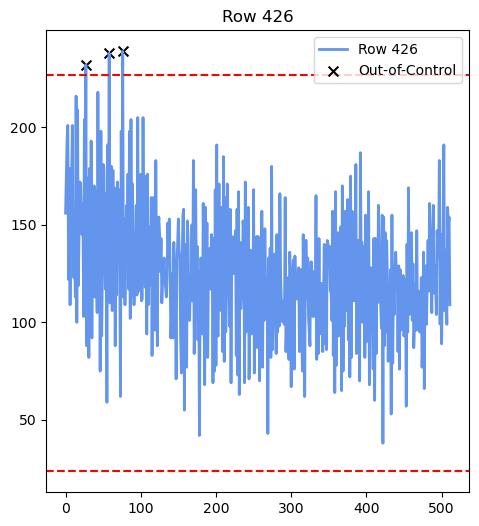

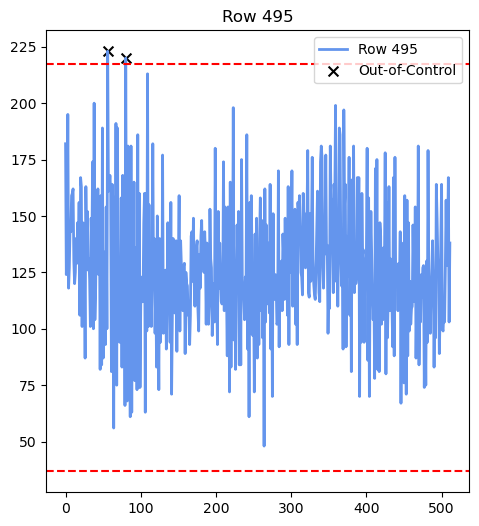

In [4]:
control_chart1= generate_row_xbar_chart_single_row(gray_image, r=426)
control_chart2= generate_row_xbar_chart_single_row(gray_image, r=495) 

Next, 2-sigma limits are employed to determine whether decreasing control limits will yield more accurate results.

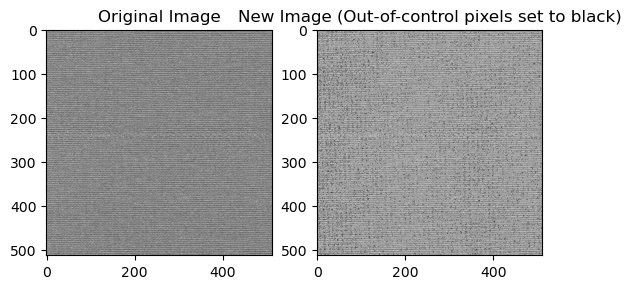

In [5]:
new_image, out_of_control_pixels = generate_row_xbar_chart(gray_image, control_limit=2)

The result still does not demonstrate accurate detection.

## X-BAR CONTROL CHARTS FOR COLUMNS

X-bar charts are constructed for each column, employing 3-sigma control limits. Out-of-control points are identified and highlighted on the image by setting them 0.

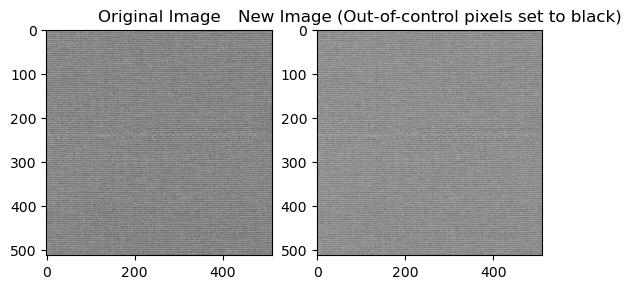

[[160, 1], [245, 9], [274, 30], [334, 34], [177, 38], [274, 41], [261, 52], [444, 66], [122, 67], [173, 67], [253, 71], [474, 98], [201, 109], [161, 110], [252, 110], [249, 130], [229, 131], [493, 131], [295, 134], [130, 141], [381, 153], [468, 170], [253, 173], [385, 177], [499, 178], [164, 192], [238, 195], [499, 202], [164, 203], [292, 203], [251, 214], [53, 220], [56, 231], [225, 245], [102, 246], [317, 269], [21, 271], [307, 278], [150, 288], [289, 291], [250, 310], [255, 310], [306, 310], [239, 321], [128, 328], [421, 338], [360, 342], [35, 345], [293, 356], [18, 357], [345, 364], [345, 388], [172, 392], [485, 392], [220, 395], [104, 402], [428, 403], [251, 418], [151, 428], [250, 428], [214, 439], [129, 460], [228, 461], [296, 463], [247, 493], [278, 499]]


In [6]:
#column x-bar chart
def generate_column_xbar_chart(image, control_limit=3):
    new_image = np.copy(image)
    out_of_control_pixels = []

    for i in range(image.shape[1]):
        column_data = image[:, i]
        xbar = np.mean(column_data)
        s = np.std(column_data, ddof=1)

        xbar_upper_limit = xbar + control_limit * s
        xbar_lower_limit = max(xbar - control_limit * s, 0)
        

        for j in range(image.shape[0]):
            if image[j, i] < xbar_lower_limit or image[j, i] > xbar_upper_limit:
                new_image[j, i] = 0
                out_of_control_pixels.append([j, i])
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(new_image, cmap='gray')
    plt.title('New Image (Out-of-control pixels set to black)')

    plt.show()

    return new_image, out_of_control_pixels


new_image, out_of_control_pixels = generate_column_xbar_chart(gray_image, control_limit=3)
print(out_of_control_pixels)



Although it is expected to be more successful for column charts to identify the defect, as the defect points are laid out horizontally, the defect could not be identified again. Once more, two of the control charts is plotted below as an example. 

In [7]:
# Plot a control chart
import numpy as np
import matplotlib.pyplot as plt

def generate_column_xbar_chart_single_column(image, c):
    new_image = np.copy(image)
    out_of_control_pixels = []

    column_data = image[:, c]
    xbar = np.mean(column_data)
    s = np.std(column_data, ddof=1)

    xbar_upper_limit = xbar + 3 * s
    xbar_lower_limit = max(xbar - 3 * s, 0)

    for j in range(image.shape[0]):
        if image[j, c] < xbar_lower_limit or image[j, c] > xbar_upper_limit:
            new_image[j, c] = 0
            out_of_control_pixels.append([j, c])
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(column_data, label='Column {}'.format(c), color='cornflowerblue', linewidth=2)
    plt.axhline(y=xbar_upper_limit, color='r', linestyle='--',  linewidth=1.5)
    plt.axhline(y=xbar_lower_limit, color='r', linestyle='--',  linewidth=1.5)

    for j in range(len(out_of_control_pixels)):
        idx = out_of_control_pixels[j][0]
        plt.scatter(idx, column_data[idx], color='black', marker='x', s=50, label='Out-of-Control' if j == 0 else '')
    plt.title('Column {}'.format(c))
    plt.legend()



    return out_of_control_pixels


The selected columns are 203 and 392.

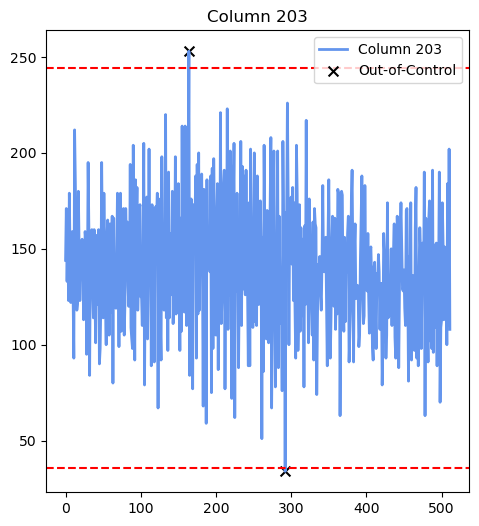

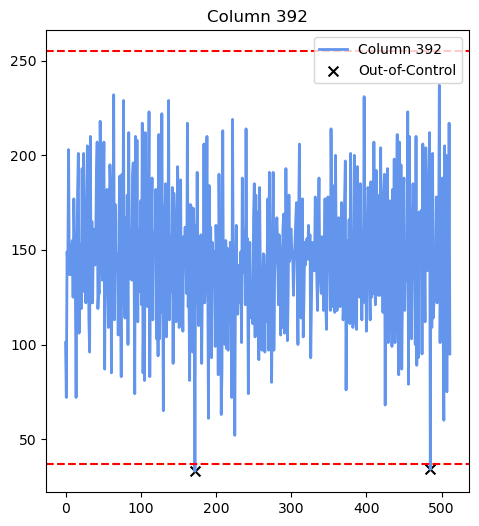

In [8]:
control_chart1=generate_column_xbar_chart_single_column(gray_image, c=203)
control_chart2=generate_column_xbar_chart_single_column(gray_image, c=392)    

Next, two-sigma limits are employed to assess whether there will be any improvement:

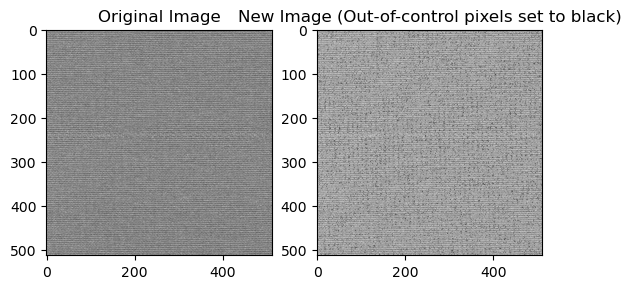

In [9]:
new_image, out_of_control_pixels = generate_column_xbar_chart(gray_image, control_limit=2)

There is no accurate detection.

## EWMA CONTROL CHARTS

To enhance the analysis, an Exponentially Weighted Moving Average (EWMA) control chart is implemented for both columns and rows separately, with the expectation that it will more efficiently identify small changes. 

### COLUMNS

Firstly, the control chart is applied for every column and out-of-control points are identified and highlighted on the image. An alpha value of 0.2 and an L value of 3 are chosen, aligning with common industry practices.

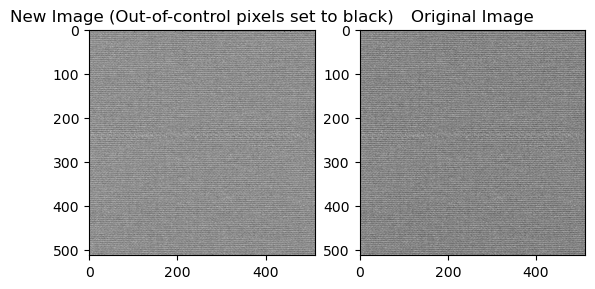

In [10]:
def column_ewma_control_chart(image, alpha, L):
    new_image = np.copy(image)
    out_of_control_pixels = []

    for i in range(image.shape[1]):
        column_data = image[:, i]
        z = [column_data[0]]
        for j in range(1, len(column_data)):
            new_z = alpha * column_data[j] + (1 - alpha) * z[j - 1]
            z.append(new_z)
            ucl = np.mean(column_data) + L * np.std(column_data) * math.sqrt(((alpha / ((2 - alpha))) * (1 - (1 - alpha) ** (2 * j))))
            lcl = np.mean(column_data) - L * np.std(column_data) * math.sqrt(((alpha / ((2 - alpha))) * (1 - (1 - alpha) ** (2 * j))))
            if new_z < lcl or new_z > ucl:
                new_image[j, i] = 0
                out_of_control_pixels.append([j, i])
    plt.subplot(1, 2, 1)
    plt.imshow(new_image, cmap='gray')
    plt.title('New Image (Out-of-control pixels set to black)')

    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')

    plt.show()

    return new_image, out_of_control_pixels


new_image, out_of_control_pixels = column_ewma_control_chart(gray_image, alpha=0.2, L=3)
#print(out_of_control_pixels5)



The number of out-of-control points is low, making them difficult to discern in the image. L value has been reduced to 2 to see whether this adjustment will make any noticeable improvement.

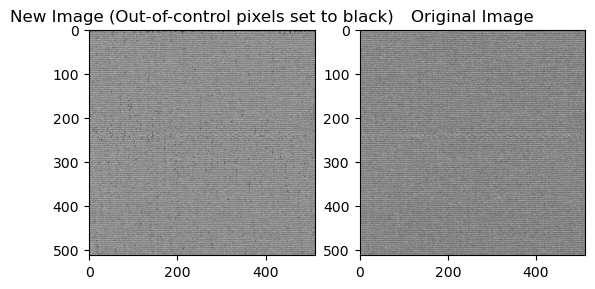

In [11]:
new_image, out_of_control_pixels = column_ewma_control_chart(gray_image, alpha=0.2, L=2)


The defect area still cannot be detected, even though the number of out-of-control pixels has increased as expected.

### ROWS

Next, the same practise is employed for rows of the pixel data and out-of-control points are identified and highlighted on the image:

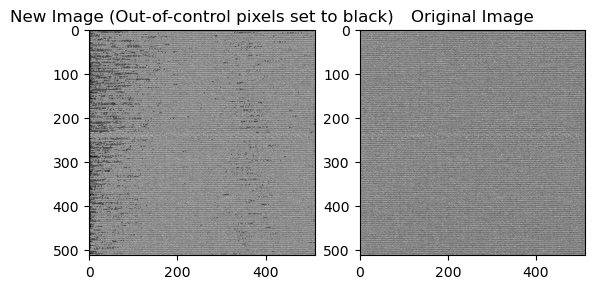

In [12]:
#ewma control chart,row
def row_ewma_control_chart_row(image, alpha, L):
    new_image = np.copy(image)
    out_of_control_pixels = []

    for i in range(image.shape[0]):
        row_data = image[i, :]
        z = [row_data[0]]
        for j in range(1, len(row_data)):
            new_z = alpha * row_data[j] + (1 - alpha) * z[j - 1]
            z.append(new_z)
            ucl = np.mean(row_data) + L * np.std(row_data) * math.sqrt((alpha / ((2 - alpha))) * (1 - (1 - alpha) ** (2 * j)))
            lcl = np.mean(row_data) - L * np.std(row_data) * math.sqrt((alpha / ((2 - alpha))) * (1 - (1 - alpha) ** (2 * j)))
            if new_z < lcl or new_z > ucl:
                new_image[i, j] = 0
                out_of_control_pixels.append([i, j])
    plt.subplot(1, 2, 1)
    plt.imshow(new_image, cmap='gray')
    plt.title('New Image (Out-of-control pixels set to black)')

    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')

    plt.show()

    return new_image, out_of_control_pixels


new_image, out_of_control_pixels = row_ewma_control_chart_row(gray_image, alpha=0.2, L=3)



With L set to 2:

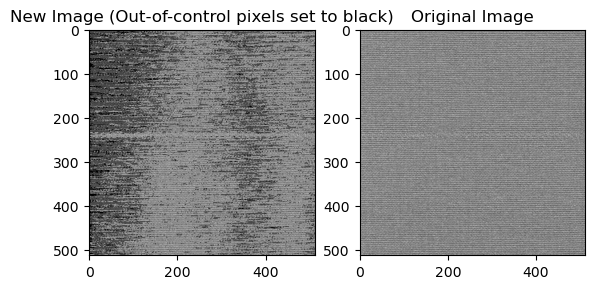

In [13]:
new_image, out_of_control_pixels = row_ewma_control_chart_row(gray_image, alpha=0.2, L=2)

The defect area remains undetected.

# OUR PROPOSAL

In [1]:
# import statements
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.filters import gabor

In [2]:
def read_image(img_path):
    """
    Function to read the image.
    Returns the image and a copy of the image.
    """
    image = io.imread(img_path, as_gray=True)
    image_copy = image.copy()
    return image, image_copy

def set_parameters(lambda_, theta, bw, sample_size):
    """
    Function to set parameters for Gabor filtering and control limits.
    Returns set values.
    """
    return lambda_, theta, bw, sample_size

def apply_gabor_filter(image, lambda_, theta, bandwidth):
    """
    Function to apply Gabor filtering.
    Returns Gabor filtered image.
    """
    frequency = 1 / lambda_
    theta = np.deg2rad(theta)
    filt_real, filt_imag = gabor(image, frequency=frequency, theta=theta, bandwidth=bandwidth)
    return filt_real

def calculate_control_limits(image, sample_size):
    """
    Function to calculate control limits for both x and s charts.
    Calculates x_bar_bar, the mean value of all pixels.
    Calculates s_bar. The mean value of s values. To calculate s values, the image is split into squares that has sqrt(sample_size) as side size.
    For ucl and lcl of x chart, A_3 value is calculated according to the formula in the table. Then the value is multiplied by 3.
    For ucl and lcl of s chart, the value is calculated according to the formula in the table.
    Returns ucl and lcl for x and s charts.
    """
    x_bar_bar = np.mean(image)
    s_bar = np.mean([np.std(image[i:i+sample_size, j:j+sample_size]) 
                     for i in range(0, image.shape[0], sample_size)
                     for j in range(0, image.shape[1], sample_size)])
    A_3 = 3 * (3 * (4 * sample_size - 3)) / (4 * (sample_size - 1) * np.sqrt(sample_size))
    ucl_x = x_bar_bar + A_3 * s_bar
    lcl_x = x_bar_bar - A_3 * s_bar
    ucl_s = 3 * (1 + (3 * 4 * sample_size - 3) / (4 * sample_size - 1) * np.sqrt(2 * (sample_size - 1)))
    lcl_s = max(0, (1 - (3 * 4 * sample_size - 3) / (4 * sample_size - 1) * np.sqrt(2 * (sample_size - 1))))
    return ucl_x, lcl_x, ucl_s, lcl_s

def detect_anomalies(image, ucl_x, lcl_x, ucl_s, lcl_s, sample_size):
    """
    Function to detect anomalies in the image.
    Each square checked. If mean or std of the square is out of control limits, all pixel values are assigned 0.
    Returns new image.
    """
    img_new = image.copy()
    num_line_elements = int(np.sqrt(sample_size))
    for i in range(0, image.shape[0] - num_line_elements, num_line_elements):
        for j in range(0, image.shape[1] - num_line_elements, num_line_elements):
            window = image[i:i+num_line_elements, j:j+num_line_elements]
            if np.mean(window) < lcl_x or np.mean(window) > ucl_x or np.std(window) < lcl_s or np.std(window) > ucl_s:
                img_new[i:i+num_line_elements, j:j+num_line_elements] = 0
    return img_new

def calculate_control_limits_rows(image):
    """
    Function to calculate control chart limits for row-by-row control.
    For each row, mean and std is calculated. UCL and LCL is assigned as x_bar_bar +- s_bar.
    Returns ucl and lcl for x chart.
    """
    x_bar_bar = np.mean(image)
    s_bar = np.mean([np.std(image[i]) 
                     for i in range(image.shape[0])])
    A_3 = 1
    ucl = x_bar_bar + A_3 * s_bar
    lcl = x_bar_bar - A_3 * s_bar
    return ucl, lcl

def calculate_control_limits_columns(image):
    """
    Function to calculate control chart limits for column-by-column control.
    For each column, mean and std is calculated. UCL and LCL is assigned as x_bar_bar +- s_bar.
    Returns ucl and lcl for x chart.
    """
    # Calculate control chart limits
    x_bar_bar = np.mean(image)
    s_bar = np.mean([np.std(image[:,i]) 
                     for i in range(image.shape[1])])
    A_3 = 1
    ucl = x_bar_bar + A_3 * s_bar
    lcl = x_bar_bar - A_3 * s_bar
    return ucl, lcl

def detect_anomalies_rows(image, ucl, lcl):
    """
    Function to detect anomalies in the image.
    Each row checked. If mean or std of the row is out of control limits, all pixel values are assigned 0.
    Returns new image.
    """
    img_new = image.copy()
    for i in range(image.shape[0]):
        if np.mean(image[i]) < lcl or np.mean(image[i]) > ucl:
            for j in range(image.shape[1]):
                img_new[i, j] = 0
    return img_new

def detect_anomalies_columns(image, ucl, lcl):
    """
    Function to detect anomalies in the image.
    Each column checked. If mean or std of the column is out of control limits, all pixel values are assigned 0.
    Returns new image.
    """
    img_new = image.copy()
    for i in range(image.shape[1]):
        if np.mean(image[:,i]) < lcl or np.mean(image[:,i]) > ucl:
            for j in range(image.shape[0]):
                img_new[j, i] = 0
    return img_new

def find_anomalies(image, image_copy, filtered_image, sample_size, lambda_, theta, bw):
    """
    Function to find anomalies in the image.
    """
    # Control limits for square method is found, then anomalies are detected.
    ucl_x, lcl_x, ucl_s, lcl_s = calculate_control_limits(filtered_image, sample_size)
    anomaly_detected_img = detect_anomalies(filtered_image, ucl_x, lcl_x, ucl_s, lcl_s, sample_size)
    
    # Number of pixel values equal to 0 counted and the value is assigned to variable named count.
    count = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if anomaly_detected_img[i][j] == 0 and image[i][j] != 0:
                image[i][j] = 0
                count += 1
    # If count is smaller than 1% of the total pixel number in the image, row and column methods are used.
    if count < 0.01 * image.shape[0] * image.shape[1]:
        lambda_ = 12
        filtered_image = apply_gabor_filter(image_copy, lambda_, theta, bw)
        ucl_row, lcl_row = calculate_control_limits_rows(filtered_image)
        ucl_column, lcl_column = calculate_control_limits_columns(filtered_image)
        # Detect anomalies
        anomaly_detected_img1 = detect_anomalies_rows(filtered_image, ucl_row, lcl_row)
        anomaly_detected_img2 = detect_anomalies_columns(filtered_image, ucl_column, lcl_column)

        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if anomaly_detected_img1[i][j] == 0 or anomaly_detected_img2[i][j] == 0:
                    image[i][j] = 0

    # Original and anomaly-detected images are plotted.
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_copy, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap='gray')
    plt.title('Anomaly Detected Image')
    plt.axis('off')
    plt.show()

In [ ]:
"""
# Create a list to store randomly selected 5 values between 2 and 197 (both included).
lst = []
# A list that holds numbers that is not available to be added to lst.
excluded_list = [7, 9, 29, 49, 50 , 51, 52, 53, 57, 74, 81, 82, 91, 101, 108, 117, 119, 121, 122, 123, 124, 126, 127, 129, 130, 131, 134, 139,
                 143, 144, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 164, 168, 169, 177, 180, 181, 186, 188, ]
counter = 0
# While counter < 5, generate a random number, add the number to the list if it is not in excluded_list and increment the count.
while counter < 5:
    random_integer = np.random.randint(2, 197)
    if random_integer not in excluded_list and random_integer not in lst:
        lst.append(random_integer)
        counter += 1
print(lst)
"""

In [5]:
lst = [56, 141, 106, 83, 90]

[75, 56, 141, 106, 83, 90]


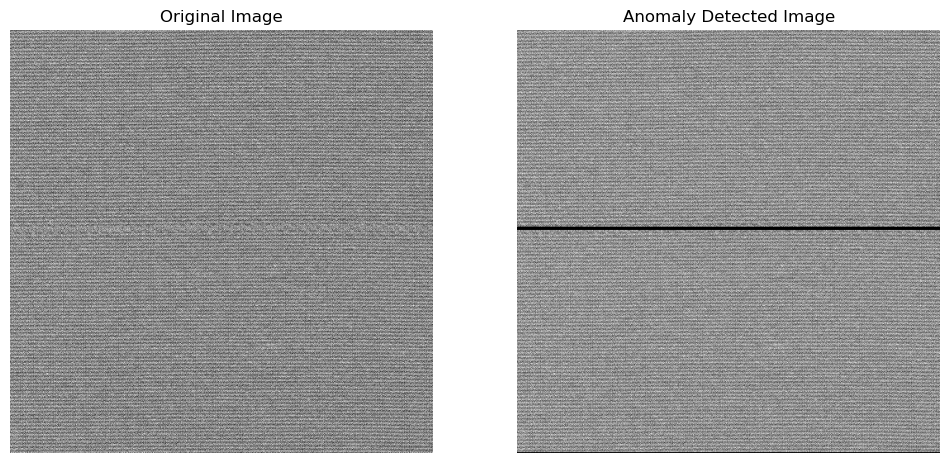

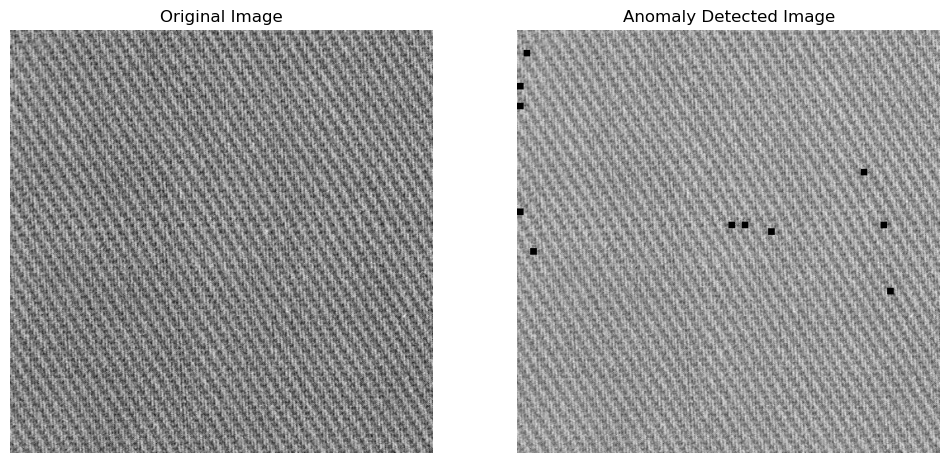

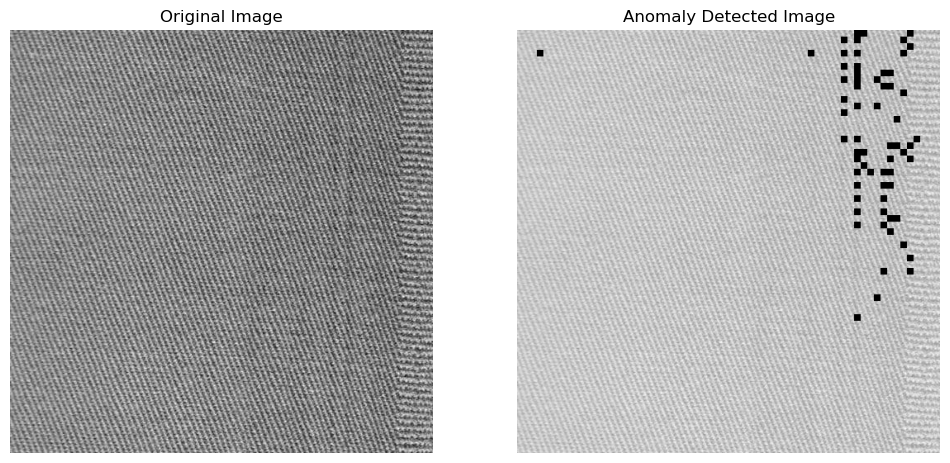

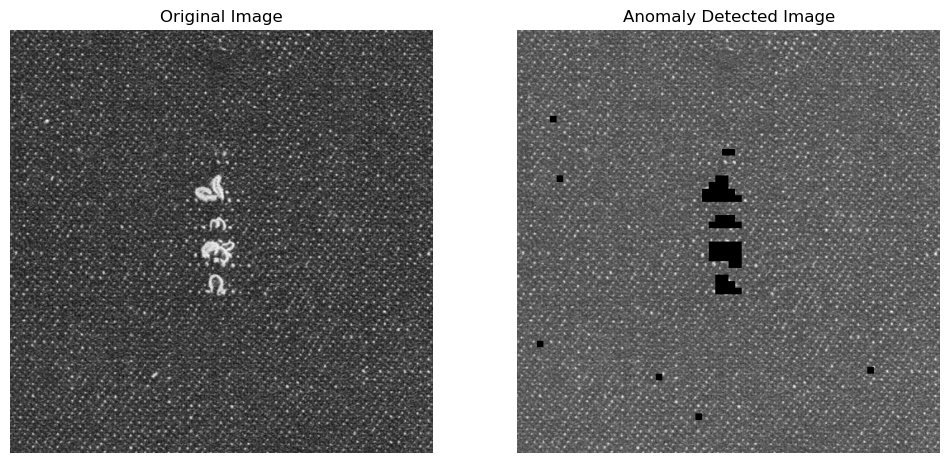

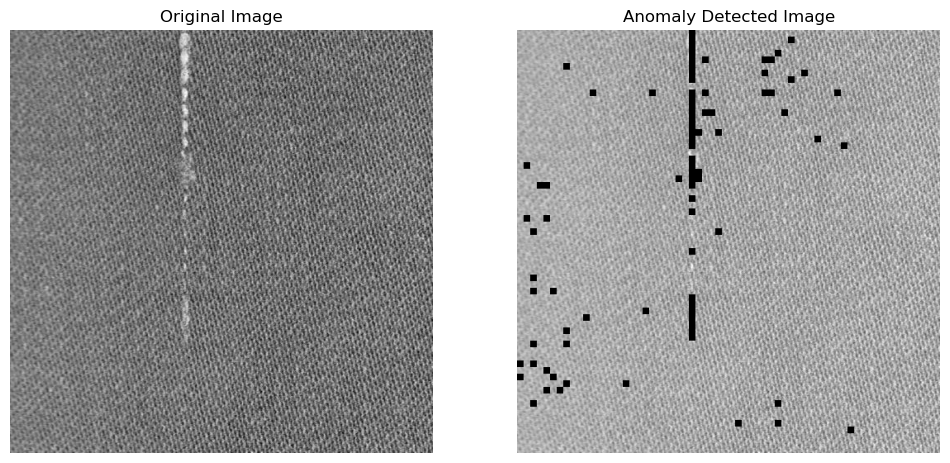

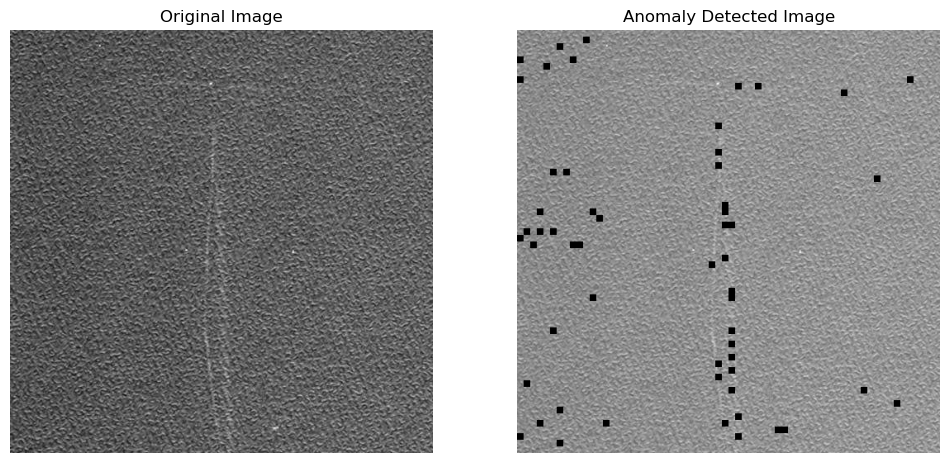

In [7]:
# Add 75 to the list since that is the image we worked on.
lst2 = [75]
lst2.extend(lst[:5])
print(lst2)
# For each element in the list, find the correct image and detect and plot anomalies.
for element in lst2:
    if element < 10:
        image, image_copy = read_image('000' + str(element) + '.jpg')
    elif element < 100:
        image, image_copy = read_image('00' + str(element) + '.jpg')
    else:
        image, image_copy = read_image('0' + str(element) + '.jpg')
    lambda_, theta, bw, sample_size = set_parameters(8, 90, 8, 64)
    filtered_image = apply_gabor_filter(image, lambda_, theta, bw)
    find_anomalies(image, image_copy, filtered_image, sample_size, lambda_, theta, bw)